# Actividades de clase, semanas 4, 5 y 6 

Practica del día 25 de junio, consta de un módulo (módulo III) que corresponde a convoluciones.

## Ayuda: Recuerde descargar el repositorio de GitHub del curso, donde estan los notebooks actualizados e implementaciones en python3.

## Aunque el ejercicio explícitamente no lo indique, recuerde que debe dar una breve conclusión de cada uno de los resultados obtenidos al finalizar cada punto.

# Módulo II

## 1.

Es posible realizar transformaciones no lineales sobre una imagen, tales como la parábola y la raíz cuadrada mostradas en la clase. De forma análoga implemente un algoritmo donde la transformación no lineal corresponda a una función exponencial. 

<br><center>$a*exp(bx+c)$ </center></br>

Donde a,b y c son constantes.

<br> Para realizar este ejercicio, lea la imagen "calabazas.png" que se encuentra en la carpeta "res" </br>

<b> Sugerencia: Utilice los ejemplos de clase como referencia para aplicar una transformación no lineal sobre la imagen, recuerde variar los parámetros a,b y c para obtener resultados distintos y poder concluir. </b>

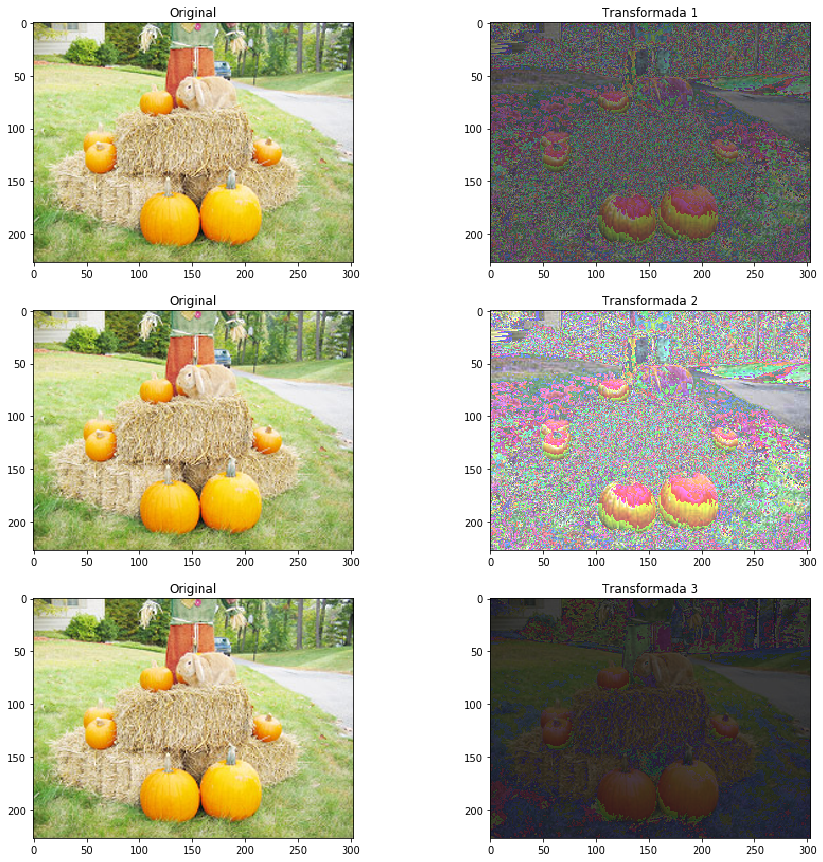

In [3]:
#Importar las librerias necesarias y no olvidar el matplotlib inline para plotear las imagenes
#Importar las librerias necesarias y no olvidar el matplotlib inline para plotear las imagenes
%matplotlib inline 
import numpy as np
import cv2
import matplotlib.pyplot as plt


def Transexp(a,b,c,img):
  
  dim = np.shape(img)

  C=c*np.ones((dim[0],dim[1],dim[2]))
  
  bMx = b*img
  bMxSc = bMx + C 

  bMxSc2 = bMxSc.copy().astype(np.float32)/255.0

  EbMxSc = np.exp(bMxSc2)

  aMEbMxSc = a*EbMxSc

  #Asegurar que la los datos queden entre 0 y 255 y sean uint8

  aMEbMxSc[aMEbMxSc<0] = 0
  aMEbMxSc = aMEbMxSc*255.0
  aMEbMxSc[aMEbMxSc>255] = 255


  aMEbMxSc = aMEbMxSc.astype(np.uint8)
  
  
  return (aMEbMxSc)


calabazas = cv2.imread('res/calabazas.png')
calabazas = cv2.cvtColor(calabazas,cv2.COLOR_BGR2RGB)


result = Transexp(0.2,5,0.5,calabazas)

result1 = Transexp(0.4,5,0.5,calabazas)

result2 = Transexp(0.1,2,0.3,calabazas)



fig, ((ax1, ax2),(ax3, ax4),(ax5, ax6)) = plt.subplots(3,2, figsize=(15, 15))


ax1.set_title('Original')
ax1.imshow(calabazas,cmap='gray')
ax2.set_title('Transformada 1')
ax2.imshow(result,cmap='gray')
ax3.set_title('Original')
ax3.imshow(calabazas,cmap='gray')
ax4.set_title('Transformada 2')
ax4.imshow(result1,cmap='gray')
ax5.set_title('Original')
ax5.imshow(calabazas,cmap='gray')
ax6.set_title('Transformada 3')
ax6.imshow(result2,cmap='gray')


Se puede observar como la transformación lineal <br><center>$a*exp(bx+c)$ </center></br> con los parametros adecuados puede ayudar a detectar sombras y reflejos, por ejemplo en las dos primeras transformaciones en las calabazas aparece de forma notoria un color rosado en las partes de mayor iluminación o donde mas luz esta llegando, esto podría servir para detectar la dirección en la que le llega la luz a los objetos en la imagen.

## 2.

Lea la imagen "eiffel.png" que se encuentra en la carpeta "res", implemente la ecualización exponencial y la ecualización de Rayleigh, posteriormente compare las imágenes modificadas y los histogramas obtenidos.

<br><b>Ecualización exponencial</b></br>

<img src = res/expo.png>

<br><b>Ecualización de Rayleigh</b></br>

<img src = res/ray.png>

Recuerde que $ln(0)$ representa una indeterminación, por lo tanto es sugerible sumar un valor $epsilon$ muy pequeño ($1e-5$ o menor) al argumento del logaritmo natural.

<br><b> Sugerencia: Una imagen saturada implica pérdida de información, por lo tanto deben utilizarse parámetros $alpha$ adecuados en cada caso. </b><br>

<Figure size 432x288 with 0 Axes>

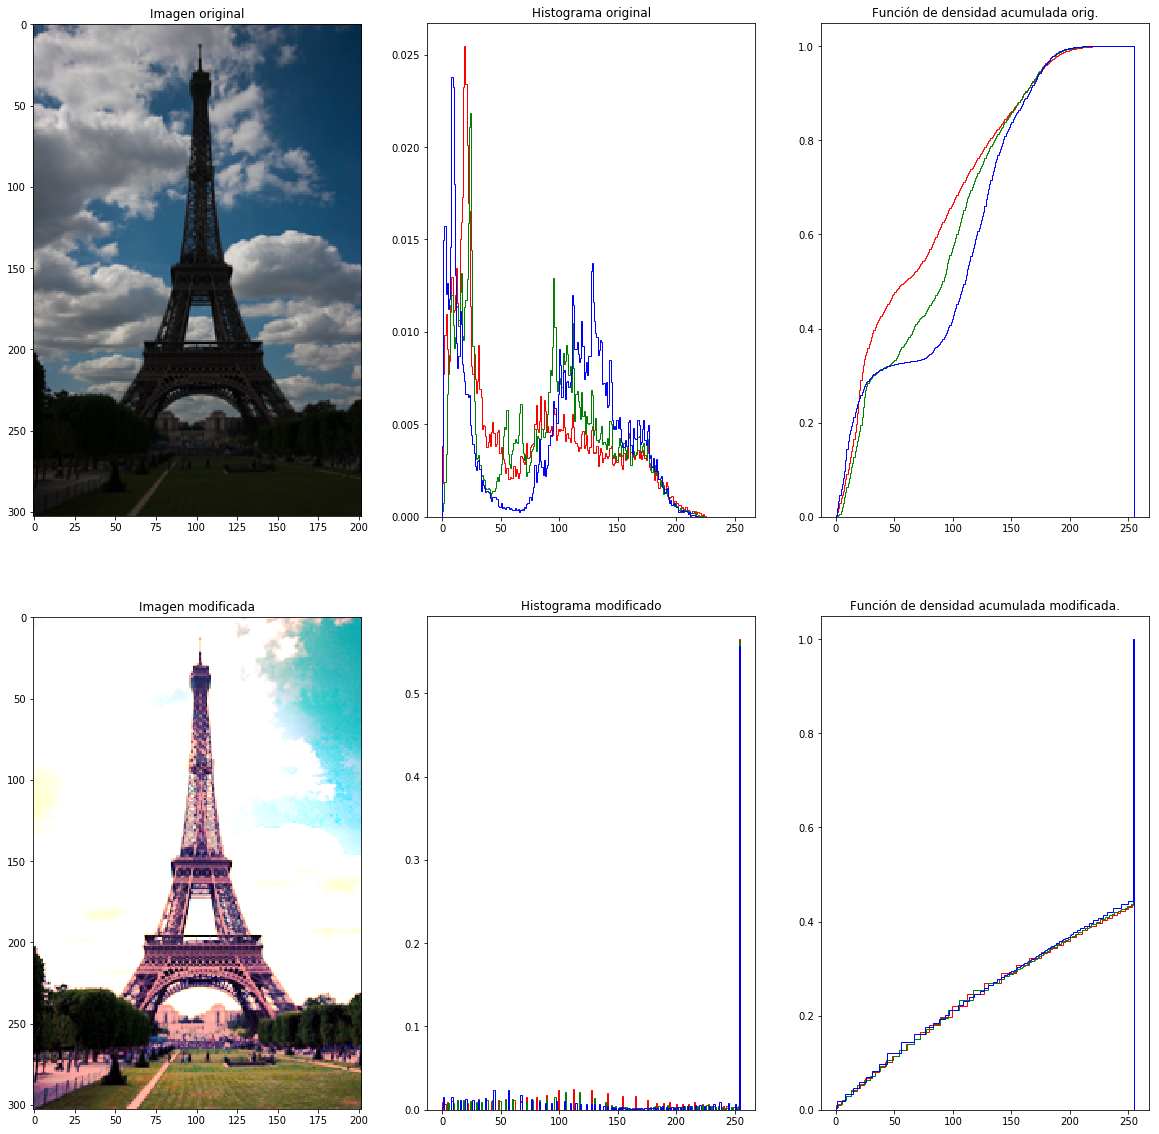

In [0]:
## Ecualizacion exponencial
#Importar librerias
%matplotlib inline 

import numpy as np
import cv2
import matplotlib.pyplot as plt

#Definir la función para aplicar la transformación sobre la imagen RGB
def apply_f_on_rgb(img, f, args):
    
    #Crear una matriz de ceros del tamaño de la imagen de entrada
    res = np.zeros(img.shape, np.uint8)
    #Aplicar la transformación f sobre cada canal del espacio de color RGB
    res[:,:,0] = f(img[:,:,0], *args)
    res[:,:,1] = f(img[:,:,1], *args)
    res[:,:,2] = f(img[:,:,2], *args)
    
    return res

#Definir la función ecualización del histograma cuyo parámetro es una imagen
def histogram_equalization(img, alfa = 0.5):
     
    #Crear matriz de ceros del tamaño de la imagen y tipo de dato flotante
    res = np.zeros(img.shape, np.float32)
    #Crear un vector 1-D de la matriz de la imagen, es decir "aplanarla"
    img_raveled = img.ravel()
    #Generar el histograma normalizado de la imagen 
    hist_norm = plt.hist(img_raveled, bins=255, range=(0.0, 255.0), normed=True)
    #Limpiar la figura actual
    plt.clf()
    #hist_norm[0] es un vector de probabilidades. Añadir al vector, el valor [1 - sumatoria de sus datos]
    pdf = hist_norm[0]
    np.append(pdf, 1.0 - np.sum(pdf))
    #Dado que se añade un dato, se realiza la sumatoria de valores sobre todo el vector
    cdf = [np.sum(pdf[0:x]) for x in range(0,256)]
    #Hallar el valor mínimo y máximo de la imagen
    gmin = np.min(img)
    gmax = np.max(img)
    
    #Generar F(g) - Función de ecualización
    for g in range(0,256):
        #res[img == g] = (gmax - gmin)*cdf[g] + gmin
        res[img == g] = -gmin - (1/alfa)*np.log(1-cdf[g] + 1e-8)*(gmax - gmin)
    #Asegurar que los datos sean uint8 y esten en el rango correspondiente
    res[res<0] = 0
    res[res>255] = 255
    res = res.astype(np.uint8)
    return res

#Leer la imagen y aplicar la transformación ecualización del histograma sobre ésta    
img = cv2.cvtColor(cv2.imread('res/eiffel.png'), cv2.COLOR_BGR2RGB)
res = apply_f_on_rgb(img, histogram_equalization, [])

#Generar subplot 2x3 para mostrar imagen, histograma y función de densidad acumulada
fig, arreglo_plots = plt.subplots(2,3, figsize=(20, 20))
colors = ('r','g','b')

arreglo_plots[0,0].set_title('Imagen original')
arreglo_plots[0,0].imshow(img, cmap="gray")
arreglo_plots[0,1].set_title('Histograma original')
for i,col in enumerate(colors):
    img_array_i = img[:,:,i].ravel()
    arreglo_plots[0,1].hist(img_array_i,histtype='step', bins=255, 
                            range=(0.0, 255.0),normed=True, color=colors[i])
arreglo_plots[0,2].set_title('Función de densidad acumulada orig.')  
for i,col in enumerate(colors):
    img_array_i = img[:,:,i].ravel()
    arreglo_plots[0,2].hist(img_array_i,histtype='step', bins=255, 
                            range=(0.0, 255.0),normed=True, color=colors[i], cumulative = True)


arreglo_plots[1,0].set_title('Imagen modificada')
arreglo_plots[1,0].imshow(res, cmap="gray")
arreglo_plots[1,1].set_title('Histograma modificado')
for i,col in enumerate(colors):
    img_array_i = res[:,:,i].ravel()
    arreglo_plots[1,1].hist(img_array_i,histtype='step', bins=255, 
                            range=(0.0, 255.0),normed=True, color=colors[i], cumulative = False)
arreglo_plots[1,2].set_title('Función de densidad acumulada modificada.')  
for i,col in enumerate(colors):
    img_array_i = res[:,:,i].ravel()
    arreglo_plots[1,2].hist(img_array_i,histtype='step', bins=255, 
                            range=(0.0, 255.0),normed=True, color=colors[i], cumulative = True)


c:\users\jean paul\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:44: RuntimeWarning: invalid value encountered in log
c:\users\jean paul\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:44: RuntimeWarning: divide by zero encountered in log


<Figure size 432x288 with 0 Axes>

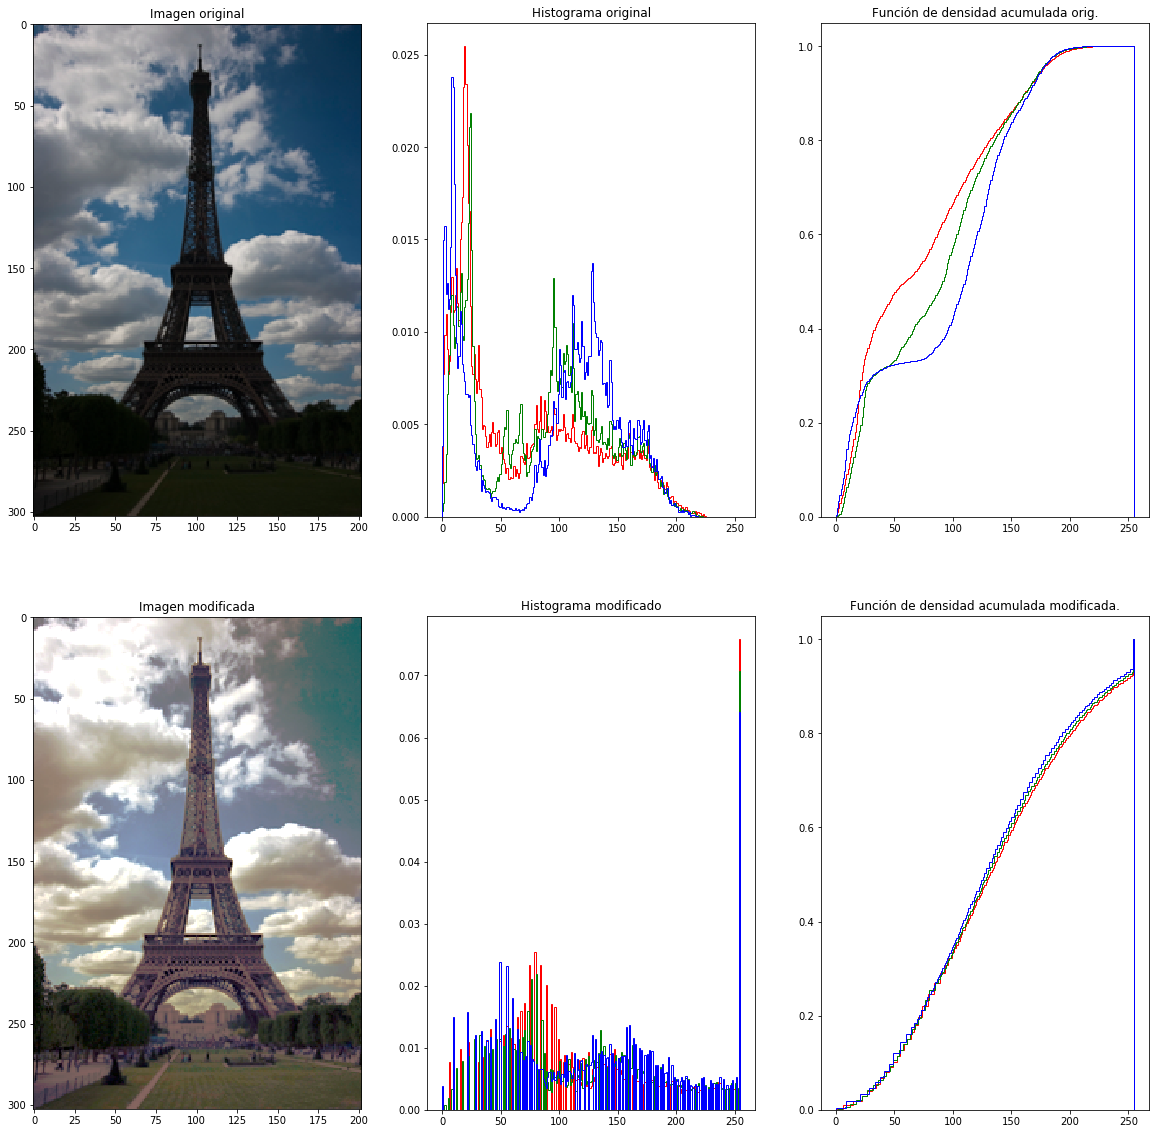

In [0]:
## Ecualizacion exponencial
#Importar librerias
%matplotlib inline 

import numpy as np
import cv2
import matplotlib.pyplot as plt

#Definir la función para aplicar la transformación sobre la imagen RGB
def apply_f_on_rgb(img, f, args):
    
    #Crear una matriz de ceros del tamaño de la imagen de entrada
    res = np.zeros(img.shape, np.uint8)
    #Aplicar la transformación f sobre cada canal del espacio de color RGB
    res[:,:,0] = f(img[:,:,0], *args)
    res[:,:,1] = f(img[:,:,1], *args)
    res[:,:,2] = f(img[:,:,2], *args)
    
    return res

#Definir la función ecualización del histograma cuyo parámetro es una imagen
def histogram_equalization(img, alfa = 0.5):
     
    #Crear matriz de ceros del tamaño de la imagen y tipo de dato flotante
    res = np.zeros(img.shape, np.float32)
    #Crear un vector 1-D de la matriz de la imagen, es decir "aplanarla"
    img_raveled = img.ravel()
    #Generar el histograma normalizado de la imagen 
    hist_norm = plt.hist(img_raveled, bins=255, range=(0.0, 255.0), normed=True)
    #Limpiar la figura actual
    plt.clf()
    #hist_norm[0] es un vector de probabilidades. Añadir al vector, el valor [1 - sumatoria de sus datos]
    pdf = hist_norm[0]
    np.append(pdf, 1.0 - np.sum(pdf))
    #Dado que se añade un dato, se realiza la sumatoria de valores sobre todo el vector
    cdf = [np.sum(pdf[0:x]) for x in range(0,256)]
    #Hallar el valor mínimo y máximo de la imagen
    gmin = np.min(img)
    gmax = np.max(img)
    
    #Generar F(g) - Función de ecualización
    for g in range(0,256):
        #res[img == g] = (gmax - gmin)*cdf[g] + gmin
        res[img == g] = gmin + np.sqrt(-2*(alfa**2)*np.log(1-cdf[g]))*(gmax - gmin)
    #Asegurar que los datos sean uint8 y esten en el rango correspondiente
    res[res<0] = 0
    res[res>255] = 255
    res = res.astype(np.uint8)
    return res

#Leer la imagen y aplicar la transformación ecualización del histograma sobre ésta    
img = cv2.cvtColor(cv2.imread('res/eiffel.png'), cv2.COLOR_BGR2RGB)
res = apply_f_on_rgb(img, histogram_equalization, [])

#Generar subplot 2x3 para mostrar imagen, histograma y función de densidad acumulada
fig, arreglo_plots = plt.subplots(2,3, figsize=(20, 20))
colors = ('r','g','b')

arreglo_plots[0,0].set_title('Imagen original')
arreglo_plots[0,0].imshow(img, cmap="gray")
arreglo_plots[0,1].set_title('Histograma original')
for i,col in enumerate(colors):
    img_array_i = img[:,:,i].ravel()
    arreglo_plots[0,1].hist(img_array_i,histtype='step', bins=255, 
                            range=(0.0, 255.0),normed=True, color=colors[i])
arreglo_plots[0,2].set_title('Función de densidad acumulada orig.')  
for i,col in enumerate(colors):
    img_array_i = img[:,:,i].ravel()
    arreglo_plots[0,2].hist(img_array_i,histtype='step', bins=255, 
                            range=(0.0, 255.0),normed=True, color=colors[i], cumulative = True)


arreglo_plots[1,0].set_title('Imagen modificada')
arreglo_plots[1,0].imshow(res, cmap="gray")
arreglo_plots[1,1].set_title('Histograma modificado')
for i,col in enumerate(colors):
    img_array_i = res[:,:,i].ravel()
    arreglo_plots[1,1].hist(img_array_i,histtype='step', bins=255, 
                            range=(0.0, 255.0),normed=True, color=colors[i], cumulative = False)
arreglo_plots[1,2].set_title('Función de densidad acumulada modificada.')  
for i,col in enumerate(colors):
    img_array_i = res[:,:,i].ravel()
    arreglo_plots[1,2].hist(img_array_i,histtype='step', bins=255, 
                            range=(0.0, 255.0),normed=True, color=colors[i], cumulative = True)


## Conclusiones
La ecualizacion es util a la hora de mejorar los detalles de una imagen que es muy oscura o clara, porque permite aclarar o dar nitidez a detalles que antes estaban ocultos por una imagen oscura/clara, la ecualizacion permite "poblar" todos esos niveles de intesidad que estaban vacios, de acuerdo con el alfa que nosotros le ingresemos.

En el caso de la torre en concreto los niveles de intensidad que estan cerca al blanco habia muy pocos valores, con la ecualizacion podemos ver mas colores en estos lugares que antes estaban vacios, permitiendo ver mas detalles en la imagen.

## 3.

Lea la imagen "gatonegro.jpg" que se encuentra en la carpeta "res", a continuación aplique una transformación gamma, donde pueda, variando los parámetros a y gamma, concluir acerca del comportamiento de la imagen con esta transformación aplicada.

Recuerde que la transformación gamma viene dada por:

<center><h3>$f(x)= ax^\gamma$</h3></center>

<img src="res/gamma.png">

¿Qué sucede si 0 < gamma < 1? ¿Qué sucede si gamma > 1? Debe mostrar los resultados obtenidos.

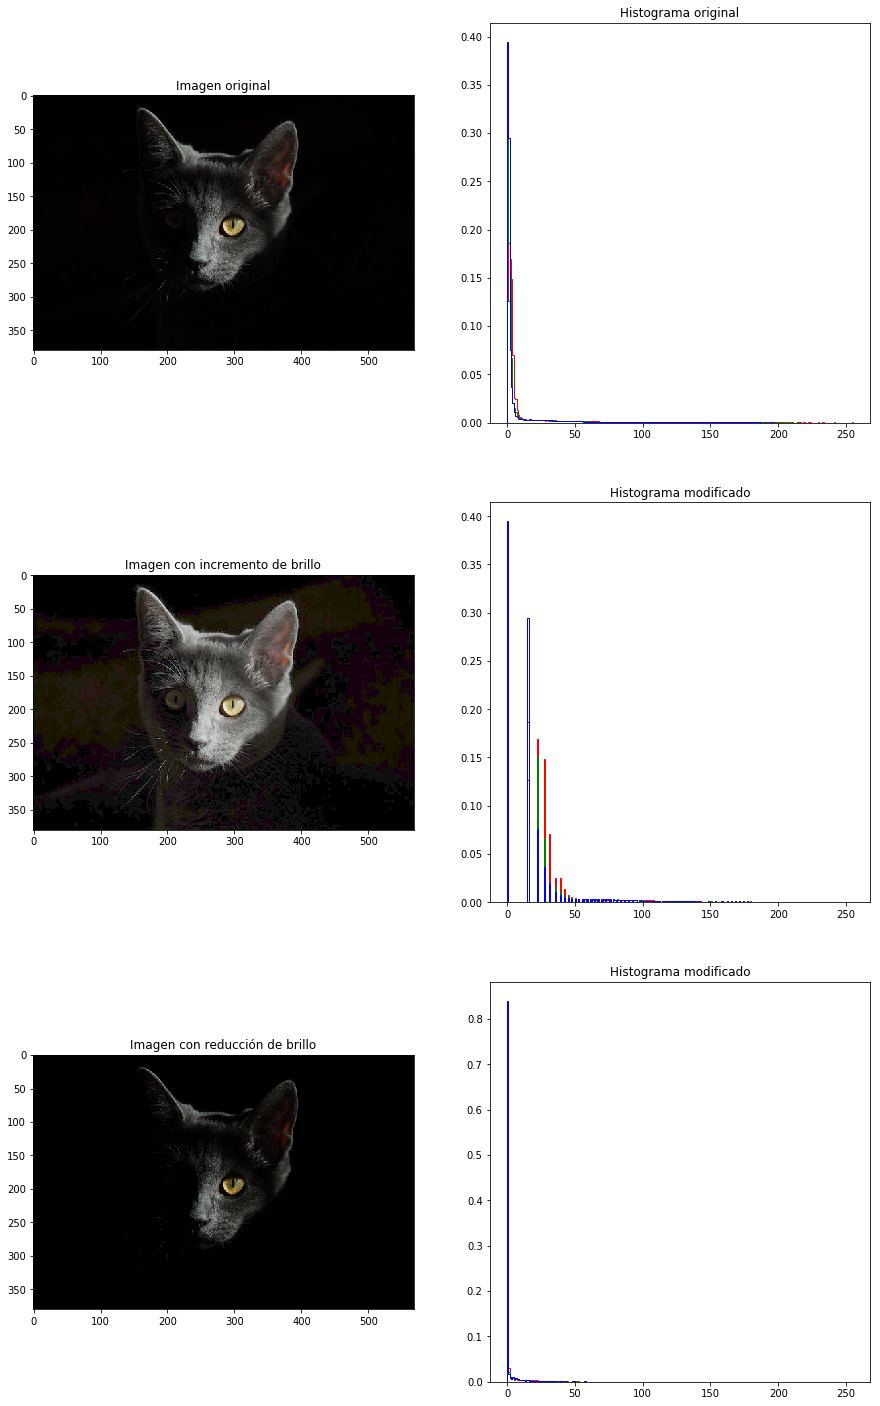

In [0]:
#Importar liberias
%matplotlib inline 

import numpy as np
import cv2
import matplotlib.pyplot as plt

#Definir la función para aplicar la transformación sobre la imagen RGB
def apply_f_on_rgb(img, f, args):
    
    #Crear una matriz de ceros del tamaño de la imagen de entrada
    res = np.zeros(img.shape, np.uint8)
    #Aplicar la transformación f sobre cada canal del espacio de color RGB
    res[:,:,0] = f(img[:,:,0], *args)
    res[:,:,1] = f(img[:,:,1], *args)
    res[:,:,2] = f(img[:,:,2], *args)
    
    return res

#Definir la función de transformación de la imagen (corrección gamma)
def gamma_correction(img, a, gamma):
    
    #Crear copia de la imagen tipo flotante dada la normalización
    img_copy = img.copy().astype(np.float32)/255.0
    #La función corrección gamma es de la forma ax^gamma, donde x es la imagen de entrada
    res_gamma = cv2.pow(img_copy,gamma)
    res = cv2.multiply(res_gamma, a)
    
    #Asegurar que la los datos queden entre 0 y 255 y sean uint8
    res[res<0] = 0
    res = res*255.0
    res[res>255] = 255
    
    res = res.astype(np.uint8)
    
    return res

#Leer la imagen de entrada
img = cv2.cvtColor(cv2.imread('res/gatonegro.jpg'), cv2.COLOR_BGR2RGB)

#Dar valor a los parámetros a,gamma (args)
a = 1
gamma = 0.5

#Aplicar la transformación corrección gamma sobre la imagen de entrada
res_brillante = apply_f_on_rgb(img, gamma_correction, [a, gamma])

#Variar los parámetros a y gamma y volver a aplicar la corrección
a = 1
gamma = 1.5

res_oscuro = apply_f_on_rgb(img, gamma_correction, [a, gamma])

#Generar un subplot 2x2 para contrastar imágen original con transformada y sus histogramas
fig, arreglo_plots = plt.subplots(3,2, figsize=(15, 25))
colors = ('r','g','b')

arreglo_plots[0,0].set_title('Imagen original')
arreglo_plots[0,0].imshow(img, cmap="gray")
arreglo_plots[0,1].set_title('Histograma original')
for i,col in enumerate(colors):
    img_array_i = img[:,:,i].ravel()
    arreglo_plots[0,1].hist(img_array_i,histtype='step', bins=255, 
                            range=(0.0, 255.0),normed=True, color=colors[i])

arreglo_plots[1,0].set_title('Imagen con incremento de brillo')
arreglo_plots[1,0].imshow(res_brillante, cmap="gray")
arreglo_plots[1,1].set_title('Histograma modificado')
for i,col in enumerate(colors):
    img_array_i = res_brillante[:,:,i].ravel()
    arreglo_plots[1,1].hist(img_array_i,histtype='step', bins=255, 
                            range=(0.0, 255.0),normed=True, color=colors[i])
    
arreglo_plots[2,0].set_title('Imagen con reducción de brillo')
arreglo_plots[2,0].imshow(res_oscuro, cmap="gray")
arreglo_plots[2,1].set_title('Histograma modificado')
for i,col in enumerate(colors):
    img_array_i = res_oscuro[:,:,i].ravel()
    arreglo_plots[2,1].hist(img_array_i,histtype='step', bins=255, 
                            range=(0.0, 255.0),normed=True, color=colors[i])

Cuando gamma es menor a 1, el brillo incrementa, debido a que la curva exponencial es menos achatada cerca a 0, permitiendo aclarar la imagen y ver mas detalles en una imagen oscura.
Cuando gamma es mayor a 1, el brillo se reduce, debido a que la curva exponencial es mas chata cerca de 0, haciendo que la imagen se vea mas oscura.